In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading berlin-database-of-emotional-speech-emodb.zip to .\berlin-database-of-emotional-speech-emodb


100%|██████████| 38.0M/38.0M [01:37<00:00, 410kB/s]


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
%matplotlib inline

In [3]:
folder_path="D:/speech_recognition/berlin/berlin-database-of-emotional-speech-emodb/wav/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]

for file in x:
    file_path.append(folder_path + file)
    filename_identifiers=file.split('.')
    if filename_identifiers[-2][-2] == 'F':
        emotion.append('happy')
    elif filename_identifiers[-2][-2] == 'W':
        emotion.append('angry')
    elif filename_identifiers[-2][-2] == 'E':
        emotion.append('disgust')
    elif filename_identifiers[-2][-2] == 'A':
        emotion.append('fear')
    elif filename_identifiers[-2][-2] == 'T':
        emotion.append('sad')
    elif filename_identifiers[-2][-2] == 'N':
        emotion.append('neutral')
    elif filename_identifiers[-2][-2] == 'L':
        emotion.append('boredom')
    else:
        emotion.append('Unknown')

BERLIN_df = pd.DataFrame(emotion, columns=['emotion'])
BERLIN_df = pd.concat([BERLIN_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)

In [4]:
BERLIN_df

,emotion,path
0,happy,D:/speech_recognition/berlin/berlin-database-o...
1,neutral,D:/speech_recognition/berlin/berlin-database-o...
2,angry,D:/speech_recognition/berlin/berlin-database-o...
3,happy,D:/speech_recognition/berlin/berlin-database-o...
4,neutral,D:/speech_recognition/berlin/berlin-database-o...
...,...,...
530,boredom,D:/speech_recognition/berlin/berlin-database-o...
531,sad,D:/speech_recognition/berlin/berlin-database-o...
532,sad,D:/speech_recognition/berlin/berlin-database-o...
533,angry,D:/speech_recognition/berlin/berlin-database-o...


In [6]:
from IPython.display import Audio
j=0
for i in BERLIN_df['path']:
        display(Audio(i))
        j+=1
        if(j==5):
            break

In [7]:
BERLIN_df.to_csv("berlin.csv",index=False)

<AxesSubplot: >

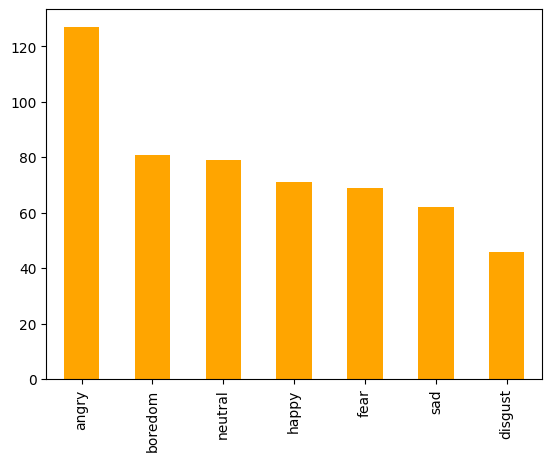

In [8]:
BERLIN_df.emotion.value_counts().plot(kind='bar', color='orange')

DATA PREPROCESSING

In [47]:
import librosa
import soundfile as sf

def resample(data, sr):
    target_sr = 44100
    return librosa.resample(data, sr, target_sr, res_type='kaiser_best')

def truncate(path, data, sr):
    desired_length=1
    desired_samples = desired_length * sr
    current_samples = len(data)
    if current_samples < desired_samples:
        # pad the audio data with silence to the desired length
        pad_length = desired_samples - current_samples
        data = librosa.util.fix_length(data, desired_samples, axis=-1, mode='constant')
        sf.write(path,data,sr)
    elif current_samples > desired_samples:
        # truncate the audio data to the desired length
        data = data[:desired_samples]
        sf.write(path,data,sr)
    else:
        return data

def normalize(path,data,sr):
    rms = librosa.feature.rms(y=data)[0]
    data = data / np.max(rms)
    sf.write(path,data,sr)

def add_noise(data):
    noise = np.random.randn(len(data))
    data = data + 0.02 * noise
    return data

def remove_silence(data, sr, threshold=30):
    return librosa.effects.trim(data, top_db=threshold, frame_length=2048, hop_length=512)

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sr, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr, pitch_factor)


In [41]:
path = "D:/speech_recognition/berlin/berlin-database-of-emotional-speech-emodb/wav/16b10Wb.wav"
data, sr = librosa.load(path)
resample(data,sr)

C:\Users\Manav\AppData\Local\Temp\ipykernel_19488\2473485104.py:6: FutureWarning: Pass orig_sr=22050, target_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.resample(data, sr, target_sr, res_type='kaiser_best')


array([ 2.5983616e-03,  4.6052705e-03,  6.2504313e-03, ...,
       -6.6165019e-05,  1.2228381e-06,  1.7146829e-05], dtype=float32)

In [45]:
normalize(path,data,sr)
truncate(path,data,sr)

In [46]:
display(Audio(path))

In [48]:
add_noise(data)

array([ 0.01414763, -0.03019319, -0.002996  , ...,  0.01469354,
       -0.00378102,  0.00522735])

In [49]:
display(Audio(path))